<a href="https://colab.research.google.com/github/AndoniFikri/CreditPrediction/blob/main/Final_Project_Andoni_Fikri_Home_Credit_Data_Set_(Modelling_%26_Tuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#Import Data Set Model

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Data Set/data for model.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305541 entries, 0 to 305540
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    305541 non-null  int64  
 1   EXT_SOURCE_2                  305541 non-null  float64
 2   EXT_SOURCE_3                  305541 non-null  float64
 3   DAYS_BIRTH                    305541 non-null  int64  
 4   DAYS_ID_PUBLISH               305541 non-null  int64  
 5   DAYS_REGISTRATION             305541 non-null  float64
 6   AMT_ANNUITY                   305541 non-null  float64
 7   DAYS_EMPLOYED                 305541 non-null  int64  
 8   AMT_CREDIT                    305541 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE        305541 non-null  float64
 10  REGION_POPULATION_RELATIVE    305541 non-null  float64
 11  AMT_INCOME_TOTAL              305541 non-null  float64
 12  EXT_SOURCE_1                  305541 non-nul

In [70]:
df.head()

,Unnamed: 0,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_ANNUITY,DAYS_EMPLOYED,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,EXT_SOURCE_1,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BEGINEXPLUATATION_MEDI,TARGET
0,0,0.262949,0.139376,-9461,-2120,-3648.0,24700.5,-637,406597.5,-1134.0,0.018801,202500.0,0.083037,10,1.0,0.9722,1
1,1,0.622246,0.535276,-16765,-291,-1186.0,35698.5,-1188,1293502.5,-828.0,0.003541,270000.0,0.311267,11,0.0,0.9851,0
2,2,0.555912,0.729567,-19046,-2531,-4260.0,6750.0,-225,135000.0,-815.0,0.010032,67500.0,0.505777,9,0.0,0.9816,0
3,3,0.650442,0.535276,-19005,-2437,-9833.0,29686.5,-3039,312682.5,-617.0,0.008019,135000.0,0.505777,17,0.0,0.9816,0
4,4,0.322738,0.535276,-19932,-3458,-4311.0,21865.5,-3038,513000.0,-1106.0,0.028663,121500.0,0.505777,11,0.0,0.9816,0


In [71]:
df = df.drop('Unnamed: 0', axis=1)

#Outlier Detection and Handling

##Outlier Detection

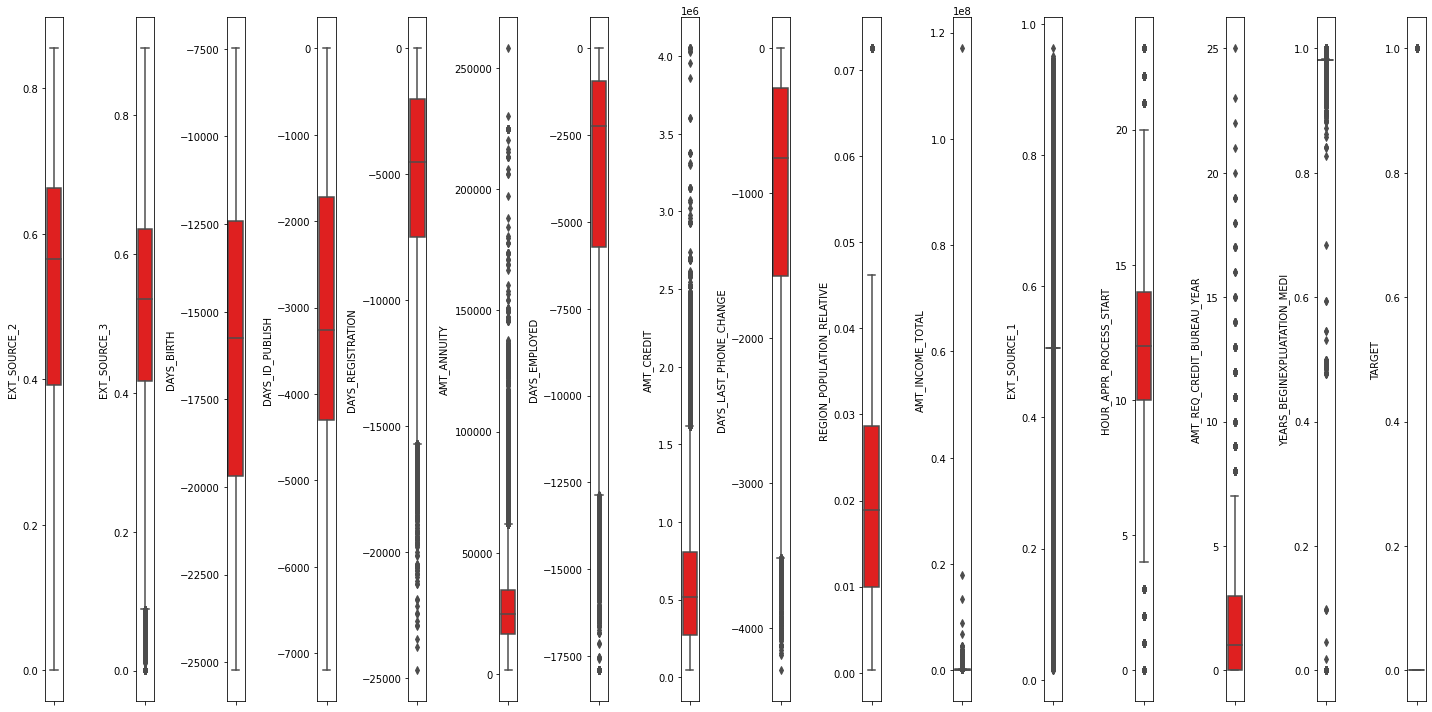

In [72]:
#For Pure Numerical Values 

plt.figure(figsize=(20,10))

# plotting
features = df.columns.tolist()
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Conclusion :      

`AMT_INCOME_TOTAL`, `EXT_SOURCE_1`, and `YEARS_BEGINEXPLUATATION_MODE` column has an extreme outlier. Thus, to create more robust model we should handle the outlier.

##Outlier Handling

In [73]:
column = df.columns.tolist()
feature_col = column[0:15]
feature_col

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_1',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BEGINEXPLUATATION_MEDI']

In [74]:
#Handling Outlier
for col in feature_col: 
  q3 = df[col].quantile(0.75)
  q1 = df[col].quantile(0.25)
  IQR = q3 - q1 
  lower_limit = q1 - (IQR * 1.5)
  upper_limit = q3 + (IQR * 1.5)
  df[col] = np.where(df[col]> upper_limit, upper_limit,
                        np.where(df[col]< lower_limit, lower_limit,
                          df[col]))

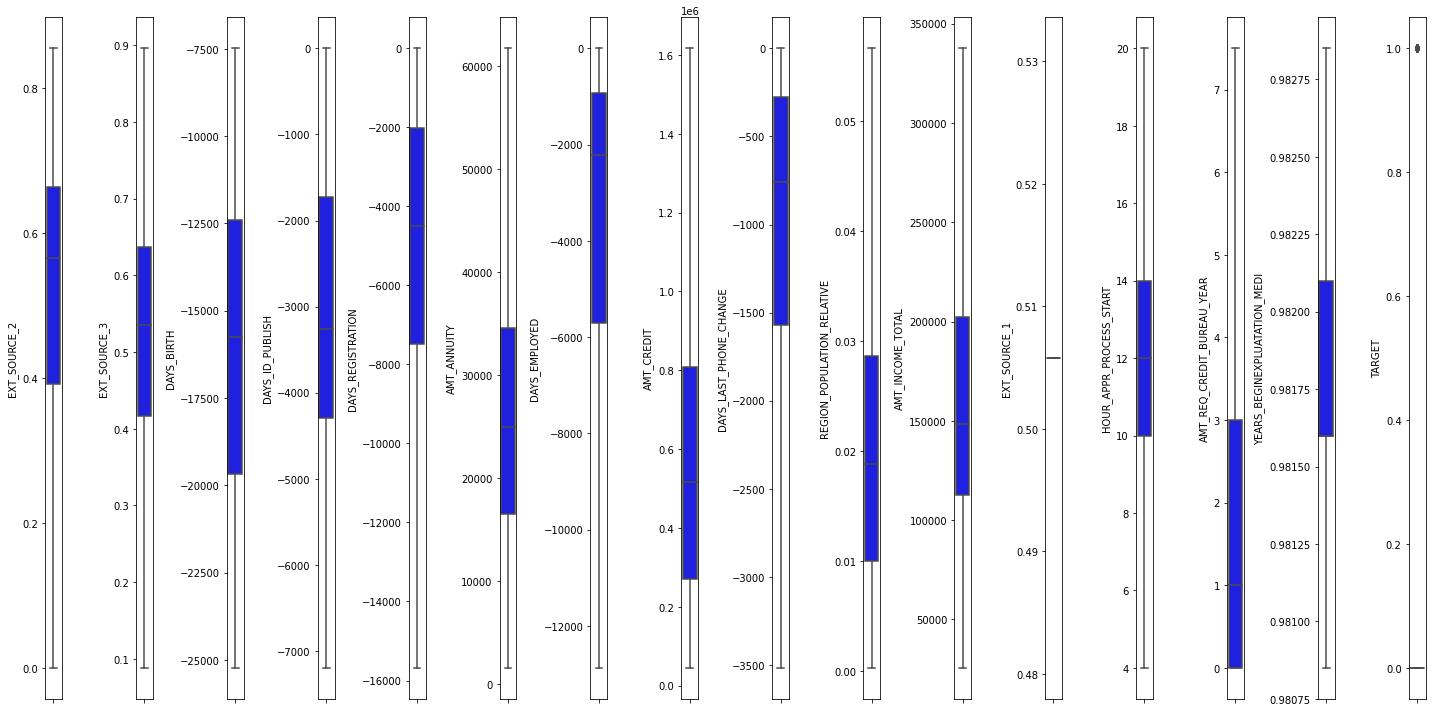

In [75]:
#Recheck for Outlier
#For Pure Numerical Values 

plt.figure(figsize=(20,10))

# plotting
features = df.columns.tolist()
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

In [76]:
df.nunique()

EXT_SOURCE_2                    119655
EXT_SOURCE_3                       599
DAYS_BIRTH                       17460
DAYS_ID_PUBLISH                   6167
DAYS_REGISTRATION                15103
AMT_ANNUITY                      11675
DAYS_EMPLOYED                    11766
AMT_CREDIT                        4969
DAYS_LAST_PHONE_CHANGE            3512
REGION_POPULATION_RELATIVE          81
AMT_INCOME_TOTAL                  2205
EXT_SOURCE_1                         1
HOUR_APPR_PROCESS_START             17
AMT_REQ_CREDIT_BUREAU_YEAR           9
YEARS_BEGINEXPLUATATION_MEDI         6
TARGET                               2
dtype: int64

In [77]:
#Drop EXT_SOURCE_1 because its only having a single value
df = df.drop('EXT_SOURCE_1', axis = 1)

In [78]:
df.shape

(305541, 15)

#Data Preparation and Modelling

##Split Feature And Target

In [102]:
X = df.drop('TARGET', axis =1)
Y = df['TARGET']

##Scaling, Split Train-Test, and SMOTE Imbalanced Data Handling

In [103]:
#Over Sampling Using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, Y)

In [104]:
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [105]:
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

##Multiple Modelling and Select Most Robust Model

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

model_alg = [RandomForestClassifier(), 
             DecisionTreeClassifier(),
             KNeighborsClassifier(), 
             LogisticRegression() 
             ]


In [107]:
df_mod_eval = pd.DataFrame(columns = ['Algorithm','AUC Score'])
df_mod_eval

,Algorithm,AUC Score


In [108]:
for model in model_alg : 
  model.fit(X_train_scaled, y_train)
  algorithm = str(type(model)).split('.')[-1][:-2]
  y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
  auc = roc_auc_score(y_test, y_pred_proba)
  df_mod_eval = df_mod_eval.append({'Algorithm' : algorithm, 
                                    'AUC Score' : auc},ignore_index=True)
  

In [109]:
df_mod_eval

,Algorithm,AUC Score
0,RandomForestClassifier,0.980015
1,DecisionTreeClassifier,0.891672
2,KNeighborsClassifier,0.937076
3,LogisticRegression,0.737595


Conclusion : The best model to predict credit risk is Random Forrest Classifier.

In [120]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

##Model Evaluation

###Classification Report

In [121]:
from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     56001
           1       0.98      0.90      0.94     56329

    accuracy                           0.94    112330
   macro avg       0.95      0.94      0.94    112330
weighted avg       0.95      0.94      0.94    112330



### AUC Plot of Best Estimator

In [122]:
y_pred_proba = rfc.predict_proba(X_test_scaled)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

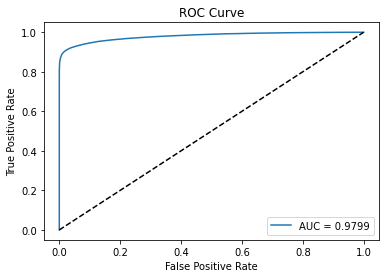

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

###KS Score of Best Estimator

In [124]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.8866')

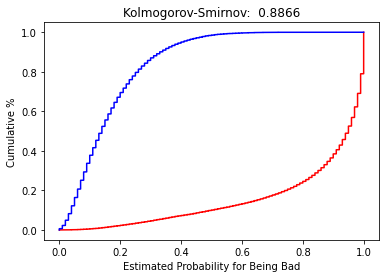

In [125]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

### Confusion Matrix


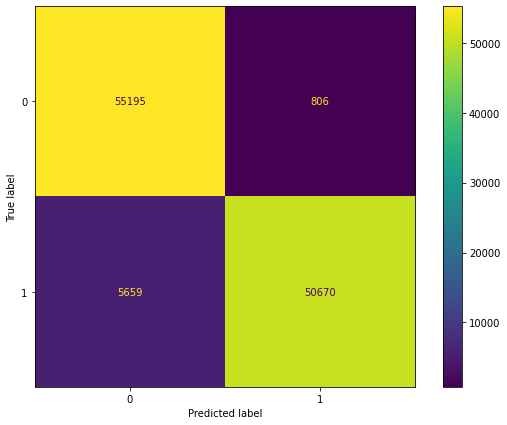

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
target_pred = rfc.predict(X_test_scaled)

cm = confusion_matrix(y_test, target_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rfc.classes_)
disp.plot(ax=ax)
plt.show()